In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### Step 1

Read the file train.csv into Python and print a few rows.


In [2]:
df = pd.read_csv('_RES/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Step 2

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.


In [5]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [7]:
df['Survived'].map({0: 'Dead', 1: 'Alive'})


0       Dead
1      Alive
2      Alive
3      Alive
4       Dead
       ...  
886     Dead
887    Alive
888     Dead
889    Alive
890     Dead
Name: Survived, Length: 891, dtype: object

Text(0.5, 1.0, 'People who survived the Titanic')

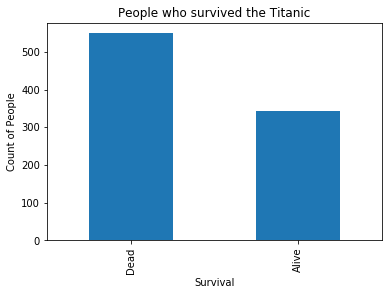

In [8]:
ax = df['Survived'].map({0: 'Dead', 1: 'Alive'}).value_counts().plot.bar()
plt.xlabel("Survival")
plt.ylabel("Count of People")
plt.title("People who survived the Titanic")

### Step 3

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers

In [9]:
df[(df['Survived'] == 1) & (df['Pclass'] == 1)].shape

(136, 12)

In [10]:
df.groupby(['Survived', 'Pclass']).size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [11]:
df.groupby(['Pclass']).mean().loc[1, 'Survived']

0.6296296296296297

### Step 4

Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.


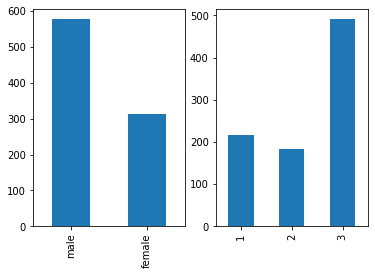

In [12]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)

df['Sex'].value_counts().plot.bar()

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)

df['Pclass'].value_counts().sort_index().plot.bar()

### Step 5

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.


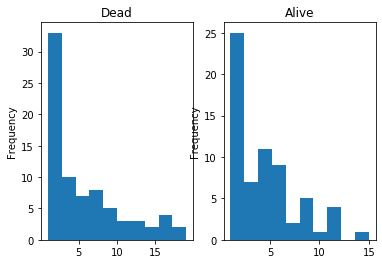

In [13]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(121)
ax1.set_title('Dead')
df[df['Survived'] == 0]['Age'].value_counts().plot.hist()

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(122)
ax2.set_title('Alive')

df[df['Survived'] == 1]['Age'].value_counts().plot.hist()

### Step 6

Calculate the average age for survived and drowned passengers separately.


In [14]:
age_avg_dead = df[df['Survived'] == 0]['Age'].mean()
age_avg_dead

30.62617924528302

In [15]:
age_avg_alive = df[df['Survived'] == 1]['Age'].mean()
age_avg_alive

28.343689655172415

### Step 7

Replace missing age values by the mean age.


In [16]:
age_mean = df['Age'].mean()

In [17]:
pd.isna(df['Age']).sum()

177

In [18]:
df["Age"].fillna(age_mean, inplace= True)

In [19]:
pd.isna(df['Age']).sum()

0

### Step 8

Create a table counting the number of surviving/dead passengers separately for 1st/2nd/3rd class and male/female.

In [30]:
df.groupby(by='Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

In [33]:
df.groupby(['Survived', 'Pclass', 'Sex']).size()

Survived  Pclass  Sex   
0         1       female      3
                  male       77
          2       female      6
                  male       91
          3       female     72
                  male      300
1         1       female     91
                  male       45
          2       female     70
                  male       17
          3       female     72
                  male       47
dtype: int64

In [1]:
from sklearn.dummy import DummyClassifier

m = DummyClassifier(strategy='most_frequent')
m.fit(X, y)
ypred = m.predict(X)

NameError: name 'X' is not defined